# Naming Trends Across Generations 📈🍼
------ 

This project explores the popularity of baby names  across decades using **SQL** for data analysis and **Python for visualization**.  
Let's discover the most popular names, their historical trends, and how naming preferences have evolved over time. 

The dataset consists of multiple tables, with **2,212,412** and **6** fields in total, based on US social security data from 1980-2009.

#### Objectives: 
1.  Track changes in popularity.
2.  Compare popularity across decades.
3.  Compare popularity across regions
4.   Dig into some unique names.

In [2]:
from db_utils import run_query, load_query

In [3]:
# Import Matplot 
import matplotlib.pyplot as plt 

## OBJECTIVE 1: TRACK CHANGES IN POPULARITY
----- 

### 1: Find the overall most popular girl's name and the most popular boy's name. 

In [5]:
# Load SQL form file
query = load_query("Most_popular_girls_name_and_boys_name.sql")
df = run_query(query)

df.head()

,Name,Num_Births,Total_Boys_And_Girls_Births
0,Jessica,863121.0,98730863.0
1,Michael,1376418.0,98730863.0


### Findings: 
Between 1980 and 2010, the most popular girl name in the U.S was **Jessica**, with a total of **863,121** births, and the most popular boy name was **Michael**, with **1,376,418** births.   
These totals reflect the cumulative popularity of these two names across all U.S states and years in the dataset.   
To keep in mind, **the total births**  recorded in the dataset during this period were **98,730,863**.

### But what do those numbers mean?🤷‍♀️
I was curious about how many girls and boys out of 1,000 were named Jessica and Michael, respectively, during this period, to give a better sense of scale.

In [7]:
query = load_query("percentage_of_girls_named_jessica.sql")
df = run_query(query)

df.head()

,Name,Num_Births_Name,Total_Girls_Births,Percentage
0,Jessica,863121.0,45856778.0,1.88


In [8]:
# Get the percentage as a float and convert to a number out of 1000
num_of_girls_named_jessica_out_of_1000 = df['Percentage'][0]*10


In [9]:

# Round the number
round_num = round(num_of_girls_named_jessica_out_of_1000,1)

print(f"About {round_num} out of every 1,000 girls were named Jessica👧.")

About 18.8 out of every 1,000 girls were named Jessica👧.


In [10]:
query = load_query('percentage_of_boys_named_michael.sql')
df = run_query(query)
df

,Name,Num_Births_Name,Total_Boys_Births,Percentage
0,Michael,1376418.0,52874085.0,2.6


In [11]:
# Get the percentage as a float and convert to a number out of 1000
num_of_boys_named_Michael_out_of_1000 = df['Percentage'][0]*10

# Round the number
round_num = round(num_of_boys_named_Michael_out_of_1000,1)

print(f"About {round_num} out of every 1,000 boys were named {df['Name'][0]}👦.")

About 26.0 out of every 1,000 boys were named Michael👦.


### What Are the Top 5 Most Popular Girl Names or Boy Names? 👧🏻👧🏼👧🏾👧👧🏼👦🏻👦🏽

After identifying **Jessica** as the most popular girl’s name between 1980 and 2010, I wanted to explore how close the other top names were in popularity.  
The queries below calculate the total number of births for the **top 5 girl names** and **top 5 boy names**, as well as their percentage share of all girl and boy births during that period.

In [13]:
query_top_5_girls = load_query('percentage_top_5_names_girls.sql')
df_top_5_girls= run_query(query_top_5_girls)

df_top_5_girls

,Name,Num_Births_Name,Total_Girls_Births,Percentage
0,Jessica,863121.0,45856778.0,1.88
1,Ashley,786945.0,45856778.0,1.72
2,Jennifer,652244.0,45856778.0,1.42
3,Sarah,621174.0,45856778.0,1.35
4,Amanda,607253.0,45856778.0,1.32


In [14]:
query_top_5_boys = load_query('percentage_top_5_names_boys.sql')
df_top_5_boys= run_query(query_top_5_boys)

df_top_5_boys

,Name,Num_Births_Name,Total_Boys_Births,Percentage
0,Michael,1376418.0,52874085.0,2.60
1,Christopher,1118253.0,52874085.0,2.11
2,Matthew,1031984.0,52874085.0,1.95
3,Joshua,957518.0,52874085.0,1.81
4,Daniel,821281.0,52874085.0,1.55


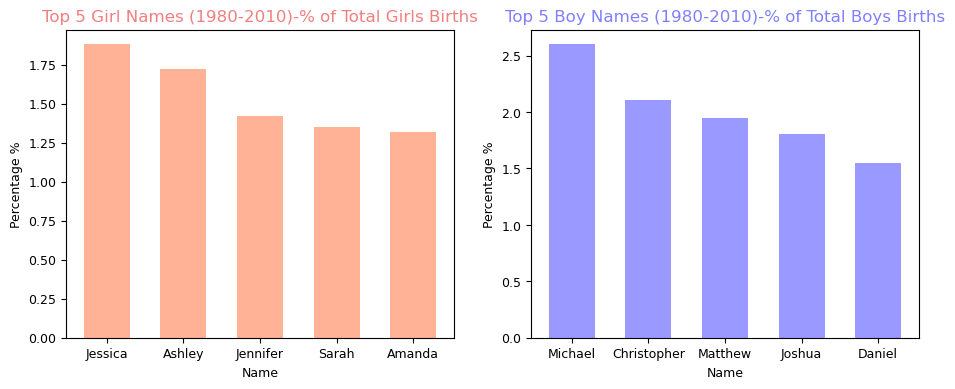

In [15]:
# Let's have some vizualizations

fig, ax = plt.subplots(1,2, figsize=(11,4))

#First plot

ax[0].bar(
        x =df_top_5_girls['Name'],
        height= df_top_5_girls['Percentage'],
        color='coral',
        alpha = 0.6,
        width = 0.6,
         )   
ax[0].set_title('Top 5 Girl Names (1980-2010)-% of Total Girls Births', fontsize=12, color='lightcoral')
ax[0].set_xlabel('Name', fontsize=9)
ax[0].set_ylabel('Percentage %', fontsize=9)
ax[0].tick_params(axis='both', labelsize=9)

# Second Plot
ax[1].bar(
        x =df_top_5_boys['Name'], 
        height= df_top_5_boys['Percentage'],
        color='blue',
        alpha = 0.4,
        width = 0.6,
         )   
ax[1].set_title('Top 5 Boy Names (1980-2010)-% of Total Boys Births', fontsize=12, color='blue', alpha = 0.5)
ax[1].set_xlabel('Name', fontsize=9)
ax[1].set_ylabel('Percentage %', fontsize=9)
ax[1].tick_params(axis='both', labelsize=9)



These bar charts show the top 5 most popular girl and boy names in the U.S. from 1980 to 2010, based on their percentage share of total girl and boy births.

Although **Jessica** and **Michael** were the most popular names during this period, the charts **highlight that no single name dominates the ladscape**. This suggests **a broad and diverse naming culture** in the United States.

### 2: Show how the names 'Jessica' and 'Michael' have changed in popularity rankins over the years.

In [18]:
query_jessica = load_query('jessica_over_the_years.sql')
df_jessica = run_query(query_jessica)

df_jessica

,Year,Name,num_babies,Popularity,Year_Total,Total_Girl_Births,Percentage
0,1980,Jessica,33923.0,3,1980,1462161.0,2.32
1,1981,Jessica,42530.0,2,1981,1469905.0,2.89
2,1982,Jessica,45444.0,2,1982,1494274.0,3.04
3,1983,Jessica,45281.0,2,1983,1475594.0,3.07
4,1984,Jessica,45854.0,2,1984,1487454.0,3.08
5,1985,Jessica,48345.0,1,1985,1517723.0,3.19
6,1986,Jessica,52668.0,1,1986,1509325.0,3.49
7,1987,Jessica,55988.0,1,1987,1525923.0,3.67
8,1988,Jessica,51537.0,1,1988,1558246.0,3.31
9,1989,Jessica,47882.0,1,1989,1613650.0,2.97


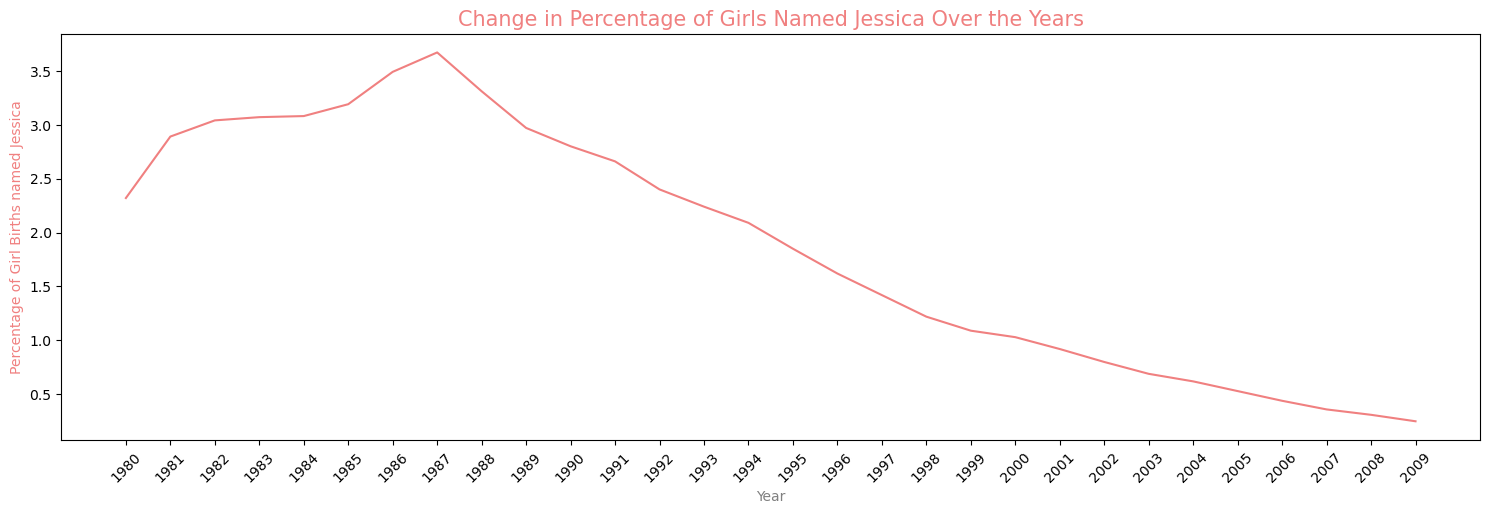

In [19]:
# Jessica

# Set up the figsize
plt.figure(figsize=(15,5))

plt.plot(df_jessica['Year'],
         df_jessica['Percentage'], 
         color = 'lightcoral')

plt.xticks(df_jessica['Year'], rotation=45)
plt.xlabel('Year', fontsize=10, color='gray')
plt.ylabel('Percentage of Girl Births named Jessica', fontsize=10, color='lightcoral')
plt.tight_layout()
plt.title('Change in Percentage of Girls Named Jessica Over the Years', fontsize=15, color='lightcoral')
plt.show()

In [23]:
query_michael = load_query('michael_over_the_years.sql')
df_michael = run_query(query_michael)

df_michael

,Year,Name,num_babies,Popularity,Year_Total,Total_Boys_Births,Percentage
0,1980,Michael,68680.0,1,1980,1668446.0,4.12
1,1981,Michael,68765.0,1,1981,1676169.0,4.10
2,1982,Michael,68228.0,1,1982,1698666.0,4.02
3,1983,Michael,67993.0,1,1983,1677972.0,4.05
4,1984,Michael,67732.0,1,1984,1689237.0,4.01
5,1985,Michael,64899.0,1,1985,1728433.0,3.75
6,1986,Michael,64202.0,1,1986,1718738.0,3.74
7,1987,Michael,63642.0,1,1987,1740426.0,3.66
8,1988,Michael,64123.0,1,1988,1782860.0,3.60
9,1989,Michael,65381.0,1,1989,1861741.0,3.51


In [ ]:
# Plot for Michael and Jessica

plt.figure(figsize=(12,6))

# Plot Michael's popularity
plt.plot(df_michael['Year'], df_michael['Percentage'],
         label= 'Michael (% of boys)',
         color='blue',
         alpha = 0.4,
         linewidth = 2)

# Plot Jessica's popularity 
plt.plot(df_jessica['Year'], df_jessica['Percentage'],
         label= 'Jessica (% of girls)',
         color='lightcoral',
         alpha = 0.4,
         linewidth = 2)

# Labels and title

plt.xlabel('Year')
plt.ylabel('Percentage of Births')
plt.title('Popularity of the Names Michael and Jessica (1980–2009)', fontsize=14)
plt.xticks(df_jessica['Year'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()